# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# TME 08Y - Maximum de vraisemblance 2

<div class="alert alert-block alert-warning">
Ce TME fait suite au TME 08X que vous devez terminer avant de poursuivre celui-ci
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1 - Test de notre modèle sur de nouvelles données

<div class="alert alert-block alert-warning">
Nous allons commencer par charger des données de test qui se présentent comme les données du TME 08X.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour charger les données de test (différentes des données du TME 08X).
</div>

In [3]:
import pickle as pkl
import gzip
image_test = pkl.load(gzip.open('image-test.pkl.gz','rb'))
chiffre_test = pkl.load(gzip.open('chiffre-test.pkl.gz','rb')) 
image_test[0], chiffre_test[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.60058594, 0.83251953, 0.76464844, 0.35595703, 0.06347656,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.20996094, 0.50878906, 0.74658203, 0.98925781, 0.94189453,
         0.49951172, 0.05349731, 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.10302734, 0.49438477,
         0.94140625, 0.83398438, 0.11199951, 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.    

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour définir la liste, pour chacun des chiffres, des tuples <code>(mu, sigma)</code> que vous auriez dû trouver au TME 08X.
</div>

In [4]:
parametres_tous_chiffres = pkl.load(gzip.open("modele.pkl.gz", 'rb'))

<div class="alert alert-block alert-warning">
<code>parametres_tous_chiffres</code> est une liste de 10 tuples, chaque tuple correspond à un chiffre entre 0 et 9.
    
Par exemple, le premier tuple correspond à l'estimation de la moyenne et de la variance des images représentant des 0.
    
Le premier tuple est constitué :
<ul>
    <li>d'une matrice $16 \times 16$ constituée des estimations des moyennes $\mu^{(0)}_{i, j}$</li>
    <li>d'une matrice $16 \times 16$ constituée des estimations des variances $(\sigma^{(0)}_{i, j})^2$</li>
</ul>
Par exemple, $\mu^{(0)}_{5, 4}$ est, pour les images représentant des 0, la moyenne des pixels situés ligne 5 et colonne 4.
    
Par exemple, $(\sigma^{(0)}_{5, 4})^2$ est, pour les images représentant des 0, la variance des pixels situés ligne 5 et colonne 4.  
    
    
Les tuples suivants sont constitués de la même manière mais correspondent aux autres chiffres.
</div>

<div class="alert alert-block alert-info">
    Q1.1 - Récupérer la fonction <code>log_densite</code> du TME 08X qui calcule la valeur de la log-densité pour une image et les paramètres $\mu^{(0)}_{i, j}, (\sigma^{(0)}_{i, j})^2$ correspondant à un chiffre particulier.
</div>

In [5]:
def log_densite(image, parametres):
    mu, sig2 = parametres
    sig2 = np.maximum(sig2, 1e-3)
    res = np.zeros((16,16))
    for i in range(16):
        for j in range(16):
            res[i][j] = np.sum(np.log(2*np.pi*sig2[i][j]) + (image[i][j] - mu[i][j])**2 / sig2[i][j])
    
    return -np.sum(res)/2

<div class="alert alert-block alert-info">
    Q1.2 - Récupérer la fonction <code>plus_vraisemblable</code> du TME 08X qui, étant donné une seule image
    et l'ensemble des <code>parametres_tous_chiffres</code>, calcule le chiffre le plus vraisemblablement représenté sur l'image.
</div>

In [6]:
def plus_vraisemblable(image, parametres):
    
    maxi = log_densite(image, parametres[0])
    i_max = 0
    
    for i in range(1, len(parametres)):
        (mu, sigma2) = parametres[i]
        if log_densite(image, (mu, sigma2)) > maxi:
            
            maxi = log_densite(image, (mu, sigma2))
            i_max = i
         
    
    return i_max

In [7]:
def plus_vraisemblable_test(image, parametres):
    return max(range(10),key=lambda x:log_densite(image,parametres[x]))

<div class="alert alert-block alert-info">
    Q1.3 - Récupérer la fonction <code>prediction</code> du TME 08X qui, étant donné un vecteur d'<code>image</code>s
    et l'ensemble des <code>parametres_tous_chiffres</code>, calcule le vecteur des chiffres les plus vraisemblablement représentés.
</div>

In [8]:
def prediction(image, parametres):
    res = []
    for i in image:
        res.append(plus_vraisemblable_test(i, parametres))
    return res

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour stocker dans une variable <code>chiffre_predit</code> le vecteur des prédictions.
</div>

In [9]:
chiffre_predit = prediction(image_test, parametres_tous_chiffres)
#chiffre_predit[0]

<div class="alert alert-block alert-info">
Q1.4 - Récupérer la fonction <code>matrice_confusion</code>  du TME 08X qui, étant donné les <code>prédictions</code> précédentes et les <code>vrais_chiffres</code>, calcule la matrice de confusion.
</div>

In [10]:
def matrice_confusion(predit,chiff):
    res=np.zeros((10,10))
    for i in range (len(predit)):
        res[predit[i],chiff[i]]+=1
    return res

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour visualiser la matrice de confusion.
</div>

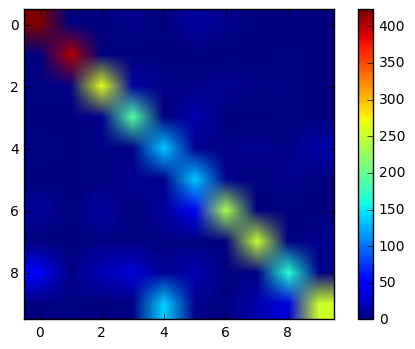

In [11]:
_ = plt.imshow(matrice_confusion(chiffre_predit, chiffre_test))
_ = plt.colorbar()

In [22]:
#chiffre_test[0]
matrice_confusion(chiffre_predit, chiffre_test)

array([[423.,   0.,   0.,   6.,   1.,  13.,   5.,   0.,   1.,   0.],
       [  0., 404.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   1.],
       [  4.,   2., 262.,  14.,   4.,   4.,   7.,   4.,   4.,   0.],
       [  0.,   0.,   5., 191.,   0.,  17.,   0.,   1.,   3.,   0.],
       [  4.,   1.,   4.,   3., 136.,   7.,   4.,   8.,   3.,  16.],
       [  1.,   0.,   2.,   7.,   6., 136.,   5.,   0.,   7.,   0.],
       [ 10.,   1.,  12.,   1.,  10.,  42., 236.,   0.,   0.,   0.],
       [  0.,   0.,   2.,   2.,   2.,   0.,   0., 248.,   1.,   7.],
       [ 45.,   2.,  23.,  33.,   7.,  19.,   3.,   3., 167.,   4.],
       [  1.,   2.,   1.,   3., 140.,   6.,   0.,  18.,  35., 253.]])

<div class="alert alert-block alert-info">
    Q1.5 - Écrire une fonction <code>taux_bonne_classif</code> qui, étant donné les <code>prédictions</code> précédentes et les <code>vrais_chiffres</code>, calcule le taux de bonnes classifications.
</div>

def taux_bonne_classif2(predit, chiff):
    nb=0
    for i in range (len(predit)):
        if predit[i]==chiff[i]:
            nb+=1
    return nb*(1./len(predit))


In [49]:
def taux_bonne_classif(predit, chiff):
    nb=0
    matrice = matrice_confusion(predit, chiff)
    for i in range(len(matrice)):
        nb += matrice[i][i]
    print(nb)
    return nb*(1./len(predit))

<div class="alert alert-block alert-info">
    Q1.6 - Calculer le taux de bonne classification sur nos données de test.
</div>

In [51]:
taux_bonne_classif(chiffre_predit, chiffre_test)

2456.0


0.8002606712284132

<div class="alert alert-block alert-warning">
    Vous devez trouver <code>0.7018572825024438</code>. Pas trop mal, non ?
</div>

# 2 -Binarisation des images

<div class="alert alert-block alert-warning">
Au lieu d'estimer chaque pixel par une loi normale, nous allons l'estimer par une loi de Bernoulli. Nous gardons l'hypothèse qu'au sein d'un modèle représentant un des chiffres, les pixels sont indépendants les uns des autres.
</div>

<div class="alert alert-block alert-warning">
Pour cela, nous avons besoin de binariser les pixels, c'est-à-dire faire en sorte qu'ils ne prennent que deux valeurs : 0 ou 1.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour recharger les données d'apprentissage.
</div>

In [15]:
image = pkl.load(gzip.open('image.pkl.gz','rb'))
chiffre = pkl.load(gzip.open('chiffre.pkl.gz','rb')) 

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour définir les fonctions <code>affiche_une_image</code> et <code>affiche_des_images</code>.
</div>

In [16]:
def affiche_une_image(image):
    _ = plt.imshow(image, cmap='gray', interpolation='none')
    _ = plt.colorbar()
    return None

def affiche_des_images(tab_images):
    nb = min(len(tab_images), 10)
    fig = plt.figure(figsize=(16, 16))
    for i in range(nb):
        fig.add_subplot(1, nb, i+1)
        _ = plt.imshow(tab_images[i], cmap='gray', interpolation='none')
    plt.show()
    return None

<div class="alert alert-block alert-info">
    Q2.1 - Écrire une fonction <code>binarise</code> qui, étant donné une image <code>im</code>, retourne l'image binarisée en remplaçant toutes les valeurs strictement positives par des 1.
</div>

In [17]:
def binarise(im):
    for i in range(len(im)):
        for j in range(16):
            #for k in range(16):
            if im[i][j]>0:
                im[i][j] = 1
    return im

In [18]:
chiffre

array([0, 9, 7, ..., 6, 3, 2])

<div class="alert alert-block alert-info">
Tester votre fonction sur l'image d'un 8.
</div>

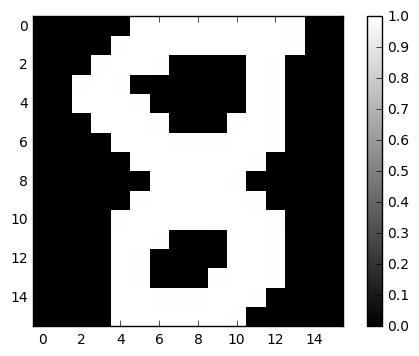

In [19]:
affiche_une_image(binarise(image[40]))

<div class="alert alert-block alert-info">
    Q2.2 - Définir une variable <code>image_bin</code> contenant le vecteur des images binarisées de la base <code>image</code>.
</div>

In [20]:
image_bin = [binarise(im) for im in image]

<div class="alert alert-block alert-info">
Observer les images de <code>image_bin</code>
</div>

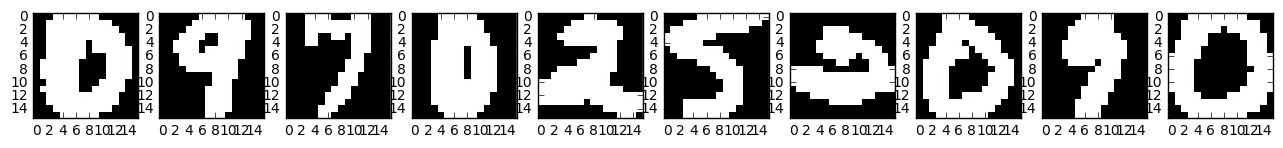

In [21]:
affiche_des_images(image_bin)

# 3 - Modèle de Bernoulli

<div class="alert alert-block alert-warning">
On définit des variable aléatoire représentant les pixels composant une image d'un chiffre donné :
$$
\begin{bmatrix} 
    X_{0, 0} & \dots & X_{0, 15} \\
    \vdots & \ddots & \vdots \\
    X_{15, 0} & \dots & X_{15, 15} 
    \end{bmatrix}
$$

On suppose de plus que la teinte de chaque pixel suit une loi de Bernoulli.
$$\forall i\in\{0,\dots,15\}, \forall j\in\{0,\dots,15\}, X_{i,j} \sim {\mathcal B}(\pi_{i,j})$$ 
</div>

<div class="alert alert-block alert-warning">
L'estimateur de maximum de vraisemblance pour les paramètres d'une loi de Bernoulli
    pour des $X_i \sim {\mathcal B}(\pi)$ <em>iid</em> sont :

$$ \Pi_{ML} = \frac{1}{n} \sum_{i = 1}^{n} X_i$$
</div>

<div class="alert alert-block alert-info">
Q3 - Refaire le même travail que dans le TME 8X mais avec le modèle de Bernoulli.
</div>

In [23]:
def estimation2(data):
    return np.mean(data)

In [99]:
mu_tous_chiffres=[estimation2(i) for i in [estimation2(image[chiffre == i]) for i in range(10)]]
mu_tous_chiffres

[0.532882188967136,
 0.2373833138856476,
 0.45030592637540456,
 0.45901900487588654,
 0.36494820283882784,
 0.4671361890889831,
 0.4089291557591623,
 0.3424402573529412,
 0.4598802298553719,
 0.3724175347222222]

In [100]:
def log_densite2(im, parametres):
    n = len(im)*len(im[1])
    y = np.sum(im)
    return y*np.log(parametres)+(n-y)*np.log(1-parametres)
    #return [parametres[i]**((np.sum(image[i])))*(1-parametres[i])**((len(image[i])-np.sum(image[i]))) for i in range(10)]

In [101]:
log_densite2(image[0],mu_tous_chiffres[1])

-256.10862991012397

In [103]:
def plus_vraisemblable_test2(image, parametres):
    return max(range(10),key=lambda x:log_densite2(image,parametres[x]))

In [104]:
plus_vraisemblable_test2(image[40], mu_tous_chiffres)

2

In [105]:
chiffre

array([0, 9, 7, ..., 6, 3, 2])